# TASK  1

## TITANIC SURVIVAL PREDICTION

To predicts whether a passenger on the Titanic survived or not,I am going to use Decision Tree algorithm.

The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived

# Decision Tree

- Decision Tree is a Supervised learning technique that can be used for both `classification and Regression problems`
-  internal nodes represent the `features of a dataset`, branches represent the `decision rules` and each `leaf node represents the outcome`.
- In a Decision tree, there are `two nodes`, which are the `Decision Node` and `Leaf Node`. 
- Decision nodes are used to make `any decision and have multiple branches`, 
#
- where as `Leaf nodes are the output of those decisions and do not contain any further branches`.
- The decisions or the test are performed on the `basis of features of the given dataset`.

- In Decision tree, `Entropy,Information gain and Gini index` are employed.
- For the good algorithm Entropy should be low and Information gain should be high as possible.
- Gini index  is a score that evaluates `how accurate a split is among the classified groups.

# IMPLEMENTATION

In [1]:
#Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [70]:
#Load dataset

df=pd.read_csv(r"C:\Users\ELCOT\Downloads\Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploring the data

In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
df.shape

(891, 12)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [76]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

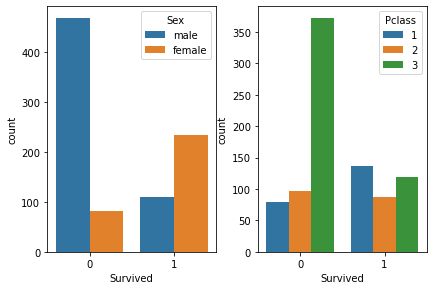

In [78]:
# Getting insights from survived
import matplotlib.pyplot as plt
import seaborn as sns
fig,axes= plt.subplots(1,2)
fig.tight_layout()
sns.countplot(x='Survived',hue='Sex',data=df,ax=axes[0])
sns.countplot(x='Survived',hue='Pclass',data=df,ax=axes[1])
plt.show()

# Handling missing values

- Missing values in Age, Cabin and Embarked.
- Age and Embark missing values should be filled.
- Cabin has a lot of missing values. Filling them might be biased. Then ignore Cabin.

In [85]:
df=df.drop(["Cabin"],axis=1)
df

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
2,6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,S
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,S
4,11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
178,871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0,47.0,1,1,11751,52.5542,S
179,872,873,0,1,"Carlsson, Mr. Frans Olof",1,33.0,0,0,695,5.0000,S
180,879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83.1583,C
181,887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S


# Drop the NaN values throughout the dataset

In [79]:
df.dropna(inplace=True)   # Drop rows with missing values

In [80]:
df=df.reset_index()
df

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
179,872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
180,879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
181,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


 
# Label Encoding

- It is commonly used in pre-processing.
- It converts categorical values into numerical values.

In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # Convert 'Sex' to numerical values

In [84]:
df

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
2,6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S
4,11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0,47.0,1,1,11751,52.5542,D35,S
179,872,873,0,1,"Carlsson, Mr. Frans Olof",1,33.0,0,0,695,5.0000,B51 B53 B55,S
180,879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83.1583,C50,C
181,887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S


# Find x and y

In [86]:
x = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

In [87]:
print(x)
print(y)

     Pclass  Sex   Age     Fare
0         1    0  38.0  71.2833
1         1    0  35.0  53.1000
2         1    1  54.0  51.8625
3         3    0   4.0  16.7000
4         1    0  58.0  26.5500
..      ...  ...   ...      ...
178       1    0  47.0  52.5542
179       1    1  33.0   5.0000
180       1    0  56.0  83.1583
181       1    0  19.0  30.0000
182       1    1  26.0  30.0000

[183 rows x 4 columns]
0      1
1      1
2      0
3      1
4      1
      ..
178    1
179    0
180    1
181    1
182    1
Name: Survived, Length: 183, dtype: int64


# Splitting the training and testing data

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialise the decision tree classifier

In [89]:
model = tree.DecisionTreeClassifier(max_depth = 100,  criterion='entropy')
model

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [90]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100)

# To find the predictions of the model

In [91]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

# To check the accuracy of the model

In [93]:
#import accuracy score
from sklearn.metrics import accuracy_score

In [94]:
score = accuracy_score(y_test, y_pred)
print("Model Accuracy:", score)

Model Accuracy: 0.7837837837837838


# It gives 78% accuracy on the prediction of whether they survived or not.